In [1]:
import tensorflow as tf

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [6]:

import matplotlib.pyplot as plt

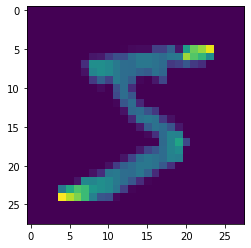

In [10]:
plt.imshow(x_train[0])

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [12]:
#build the model

model = tf.keras.models.Sequential()     #sequential is common one, there are 2 types of model

model.add(tf.keras.layers.Flatten())    #we are using flatter for only the input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))    #128 units/neurons in layer
                                                                #relu - rectified linear (default go to)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(
    optimizer='adam',  #adam is again a go to optimiser
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [13]:
#fitting the model

model.fit(x_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2619 - accuracy: 0.9235
Epoch 2/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1060 - accuracy: 0.9675
Epoch 3/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0716 - accuracy: 0.9773


In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print ('Loss=', val_loss,'\nAccuracy =', val_acc)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0899 - accuracy: 0.9721
Loss= 0.08990640049269423 
Accuracy = 0.9721


In [15]:
#to save a model
model.save('num_predictor.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_predictor.model\assets


In [19]:
# to load a saved model
new_model = tf.keras.models.load_model('num_predictor.model')

In [26]:
print (type(x_test))
predictions = model.predict([x_test])

<class 'numpy.ndarray'>


In [28]:
print (predictions[0])


[1.4699418e-09 3.8672692e-08 6.1313831e-06 1.1087470e-06 1.3706743e-10
 4.3491637e-09 3.9426822e-14 9.9999261e-01 2.2509088e-09 1.6314887e-07]


In [29]:
import numpy as np

In [31]:
print (np.argmax(predictions[0]))

7


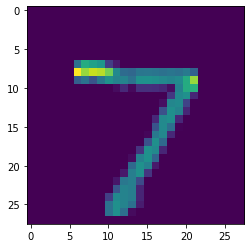

In [33]:
plt.imshow(x_test[0])

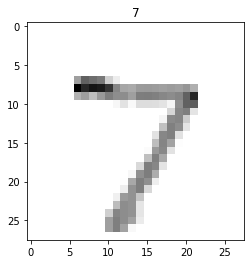

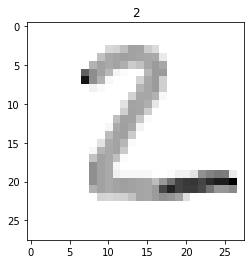

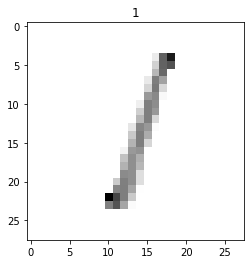

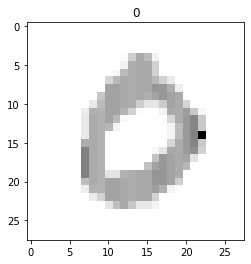

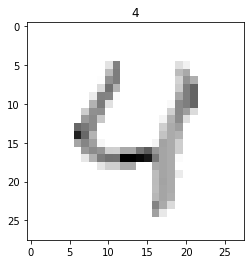

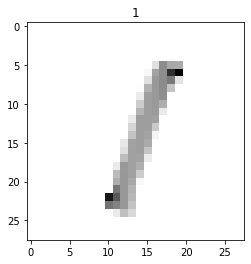

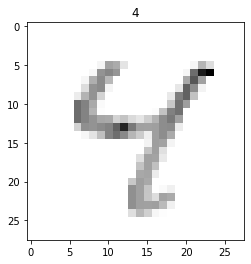

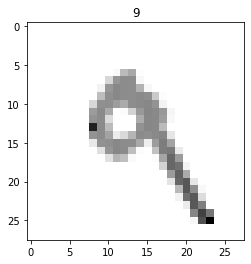

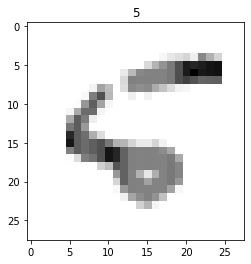

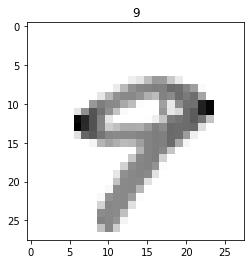

In [36]:
for i in range(10):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(str(np.argmax(predictions[i])))
    plt.show()